#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

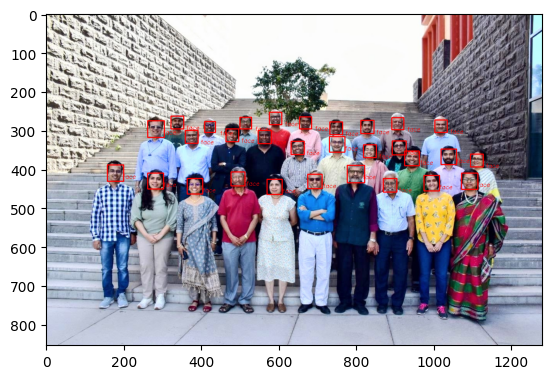

In [22]:
%matplotlib inline
## Reading the image plaksha_Faculty.jpg
img=cv.imread('Plaksha_Faculty.jpg')
## Convert the image to grayscale
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "face" ## The text you want to write
font = cv.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv.putText(img, text,(x+40  , y+35), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
#cv.imshow(f"Total number of faces detected are {len(faces_rect)}", img)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
cv.waitKey(0)
cv.destroyAllWindows()

c:\Users\Admin\OneDrive\Desktop\Coursework\semester 4\MLPR\LABS\Lab5\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


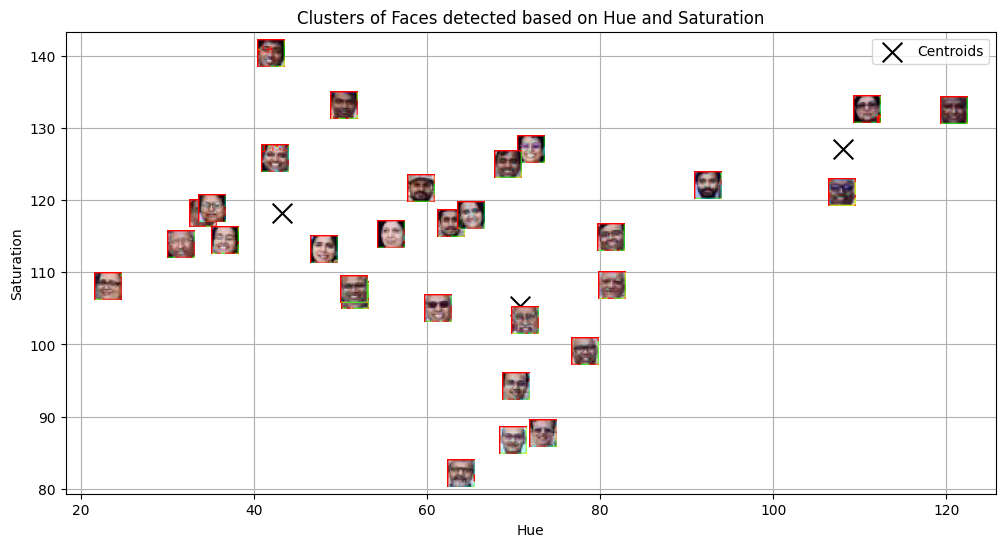

In [26]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))



# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv.cvtColor(cv.resize(face_images[i], (20, 20)), cv.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Centroids')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clusters of Faces detected based on Hue and Saturation")
## Put grid
plt.grid()
## show the plot
plt.legend()
plt.show()

In [35]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 0, 0, 2, 1, 1, 1, 2])

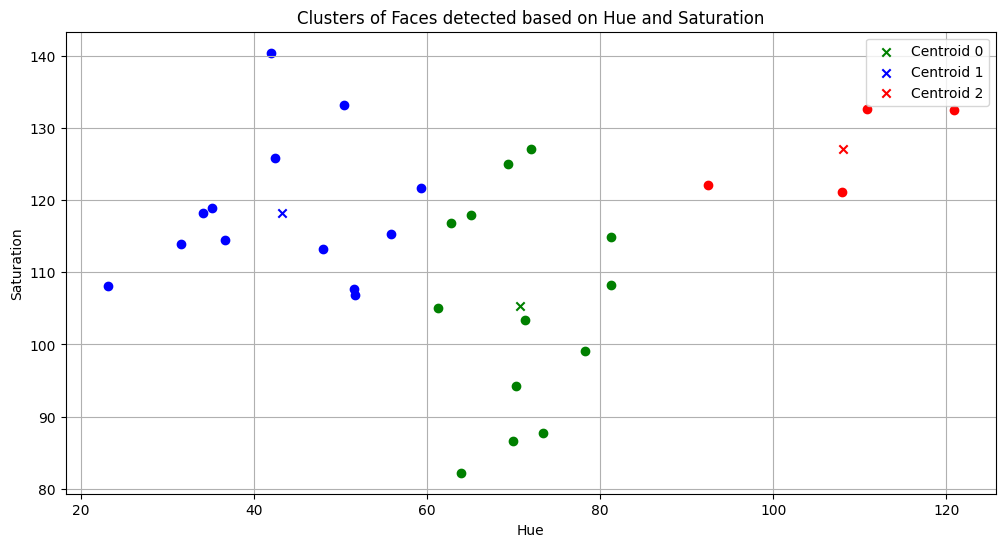

In [36]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []
cluster_2_points = []
# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    elif kmeans.labels_[i] == 1:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_2_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color="green")

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color="blue")

#Plot points for third cluster. I dont understand why the third cluster was not added.
cluster_2_points = np.array(cluster_2_points)
plt.scatter(cluster_2_points[:,0],cluster_2_points[:,1],color="red")

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
centroid_2 = np.mean(cluster_2_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1],color="green",marker="x",label="Centroid 0")
plt.scatter(centroid_1[0],centroid_1[1],color="blue",marker="x",label="Centroid 1")
plt.scatter(centroid_2[0],centroid_2[1],color="red",marker="x",label="Centroid 2")

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")    
## Put title
plt.title("Clusters of Faces detected based on Hue and Saturation")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.show()


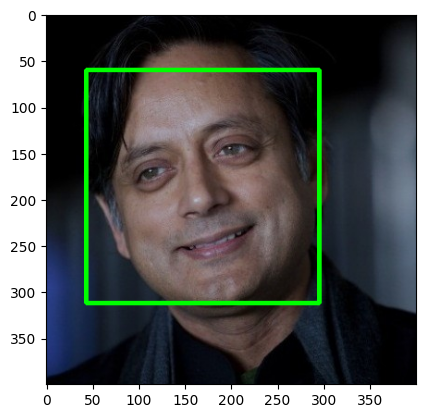

In [40]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv.imread('Dr_Shashi_Tharoor.jpg')

# Convert template image to grayscale
gray_template = cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)

# Detect faces in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_template, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the image with detected faces
plt.imshow( cv.cvtColor(template_img,cv.COLOR_BGR2RGB))
cv.waitKey(0)
cv.destroyAllWindows()


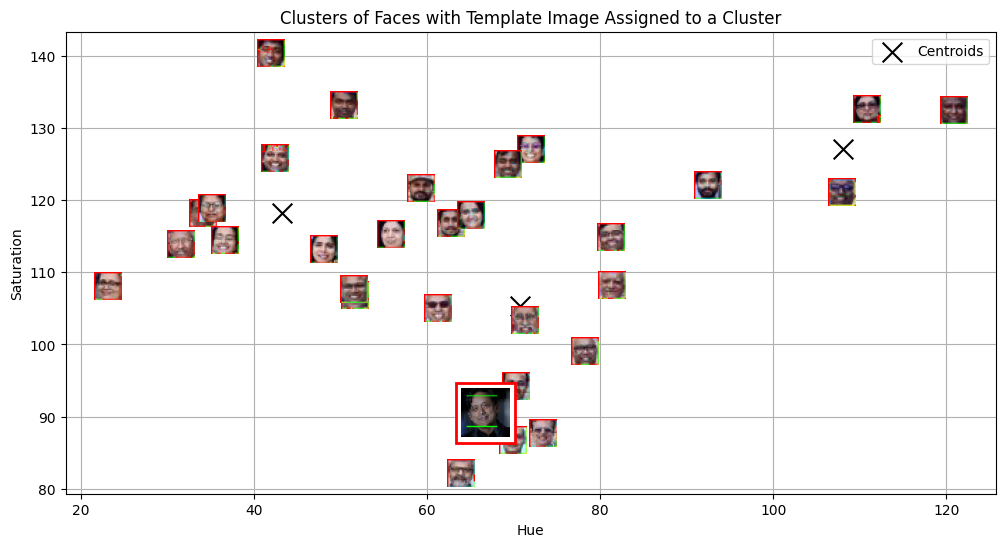

In [44]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv.cvtColor(template_img, cv.COLOR_BGR2HSV)

# Extract hue and saturation features from the template face region
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue' if kmeans.labels_[i] == 1 else 'green'
    im = OffsetImage(cv.cvtColor(cv.resize(face_images[i], (20, 20)), cv.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
elif template_label == 1:
    color = 'blue'
else:
    color = 'green'

im = OffsetImage(cv.cvtColor(cv.resize(template_img, (35, 35)), cv.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=True, bboxprops=dict(edgecolor=color, linewidth=2))
ax.add_artist(ab)

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Centroids')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Clusters of Faces with Template Image Assigned to a Cluster")

## Add grid
plt.grid(True)

## Show plot
plt.legend()
plt.show()


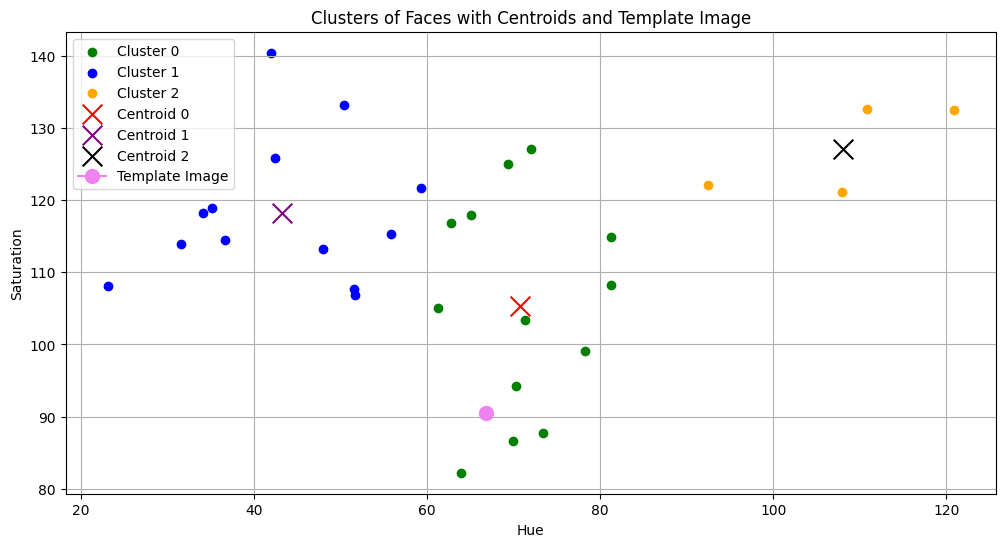

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []
cluster_2_points = []  # Added for the third cluster. I can see clearly 3 clusters in the scatter made from the images and the labels are also 0,1,2.

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    elif kmeans.labels_[i] == 1:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_2_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to NumPy arrays
cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)
cluster_2_points = np.array(cluster_2_points)

# Plot points for each cluster
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color="green", label="Cluster 0")
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color="blue", label="Cluster 1")
plt.scatter(cluster_2_points[:, 0], cluster_2_points[:, 1], color="orange", label="Cluster 2")  # Added for 3rd cluster

# Calculate and plot centroids for all three clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
centroid_2 = np.mean(cluster_2_points, axis=0)  # Added for the third cluster

# Plot centroids
plt.scatter(centroid_0[0], centroid_0[1], color="red", marker="x", s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color="purple", marker="x", s=200, label="Centroid 1")
plt.scatter(centroid_2[0], centroid_2[1], color="black", marker="x", s=200, label="Centroid 2")  # Added for 3rd cluster

# Plot the template image's Hue & Saturation position
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Template Image')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Clusters of Faces with Centroids and Template Image")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.show()


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
#### Some of the common distance metrics are eucledian, manhattan, mahalanobis, chebyshev disatance, cosine similarity, hamming distance.

#### 2. What are some real-world applications of distance-based classification algorithms? 
#### Automatic adjustment for camera setting(discussed in class), classification of animals in their physical attributes etc are some applicaiton of distance-based classification algorithm.

#### 3. Explain various distance metrics. 
#### Eucledian Distance: Normal distance, Manhattan: max of magnitude of difference of all the axes. Cosine similarity: the angle between the 2 points from the origin.

#### 4. What is the role of cross validation in model performance? 
#### It helps to evaluate a model's performance by splitting data into training and testing sets multiple times. This help us generalize the data and also use the data as multiple data by spltting the data multiple times in different order.

#### 5. Explain variance and bias in terms of KNN? 
####    Bias is the error from over simple assumption when K is large. vairance is the senstitivity to small changes in data when k is small